In [1]:
import numpy as np
import matplotlib.pyplot as plt
import distributedAcceleratedGradient as algo
from scipy.linalg import block_diag
from numpy.linalg import inv
from functools import partial
from matplotlib.lines import Line2D

In [2]:
def my_rc_params(magnifier=1):
    plt.style.use(["seaborn-poster"])
    plt.rcParams['axes.labelsize'] = 12*magnifier
    plt.rcParams['xtick.labelsize'] = 12*magnifier
    plt.rcParams['ytick.labelsize'] = 12*magnifier
    plt.rcParams['legend.fontsize'] = 8.3*magnifier
    plt.rcParams['legend.title_fontsize'] = 10*magnifier
    plt.rcParams['lines.linewidth'] = 1.5
    plt.rcParams['figure.figsize'] = 12, 6
    plt.rc('text', usetex=True)
    plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath,bm}"]
my_rc_params(2) 

In [7]:
results_path = './results/'
power2 ='/power2/'
sync0_path = results_path + 'sync0/'
no_sync0_path = results_path + 'no_sync0/'
x1tox2 = no_sync0_path + '/x1tox2/'
never_sync_path = results_path + 'never_sync/'
never_resets = results_path + '/never_resets/'
cortes =  results_path + "/nonAccDist/"
disturbances_path = results_path + "/disturbances/"
paths = [sync0_path, cortes, x1tox2, never_sync_path, never_resets]

labels = [r'HARDD~$\left(\bm{\tau}(0)=T_{r}\cdot \mathbf{1}_n\right)$', r'DGD', r'HARDD',
          r'No-coordination', r'No-restarting HARDD']
lss = ['-','-','-','-','-']
zorders = [4, 4, 3, 2, 2]
lws = [2]*5
alphas = [.9]*5
dataDualList = [np.load(file + power2 +'dual_vars.npz') for file in paths]
dataPrimalList = [np.load(file + power2 + 'primal_vars.npz') for file in paths]

## Primal Measures Plot

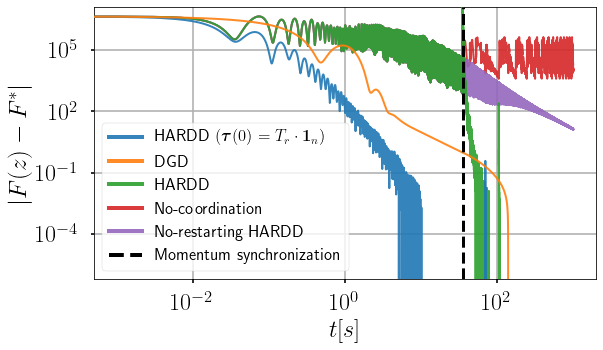

In [10]:
fig = plt.figure(figsize = (9, 5))
ax = plt.gca()
for i, (primal, label, ls, zorder, lw, alpha) in enumerate(zip(dataPrimalList,
                                                          labels, lss,
                                                          zorders, lws, alphas)):

    t = primal['t']
    t = t[:, 0] if len(t.shape) == 2 else t
    cost = primal['cost'].squeeze(axis = 2)
    
    ax = plt.gca()
    ax.loglog(t, cost, label = label,
              linestyle =ls, zorder = zorder,
              lw=lw, alpha = alpha)
    ax.set_xlabel(r'$t [s]$')
    ax.set_ylabel(r'$\left|F(z) - F^*\right|$', fontsize = 25)
    ax.set_ylim(None, 1.25e7)

ax.grid()
ax.axvline(35, ls = '--', label = r'Momentum synchronization',
               lw = 3, zorder = 5, c ='k')
    
leg = ax.legend(loc = 'lower left')   

for legobj in leg.legendHandles:
    legobj.set_linewidth(4.0)

plt.savefig(results_path+'/primal_all_comparison_log_a.png', bbox_inches ='tight', dpi = 600)

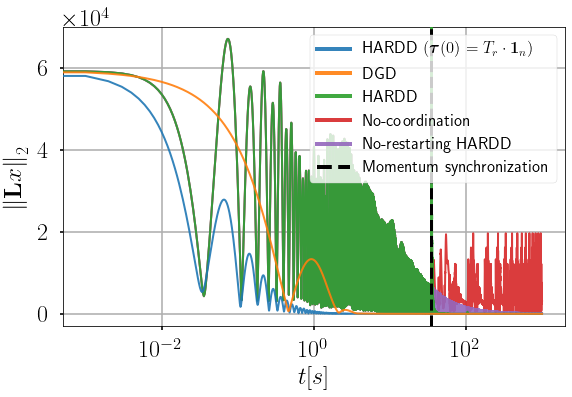

In [11]:
fig = plt.figure(figsize = (9, 5.5))
ax = plt.gca()
for i, (primal, label, ls, zorder, lw, alpha) in enumerate(zip(dataPrimalList,
                                                          labels, lss,
                                                          zorders, lws, alphas)):

    t = primal['t']
    t = t[:, 0] if len(t.shape) == 2 else t
    cost = primal['consensus']
    
    ax = plt.gca()
    ax.semilogx(t, cost, label = label,
              linestyle =ls, zorder = zorder,
              lw=lw, alpha = alpha)
    ax.set_xlabel(r'$t [s]$')
    ax.set_ylabel(r'$\left\lVert \mathbf{L}x\right\rVert_2$', fontsize = 25)
    ax.set_ylim(None, 0.7e5)
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

ax.grid()
ax.axvline(35, ls = '--', label = r'Momentum synchronization',
               lw = 3, zorder = 5, c ='k')
    
leg = ax.legend(loc = 'upper right')   

for legobj in leg.legendHandles:
    legobj.set_linewidth(4.0)

plt.savefig(results_path+'/primal_all_comparison_log_b.png', bbox_inches ='tight', dpi = 600)

## Dual Variable Plot

In [5]:
print(plt.rcParams['axes.prop_cycle'].by_key()['color'])

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


#1f77b4 4 4
#ff7f0e 2 2


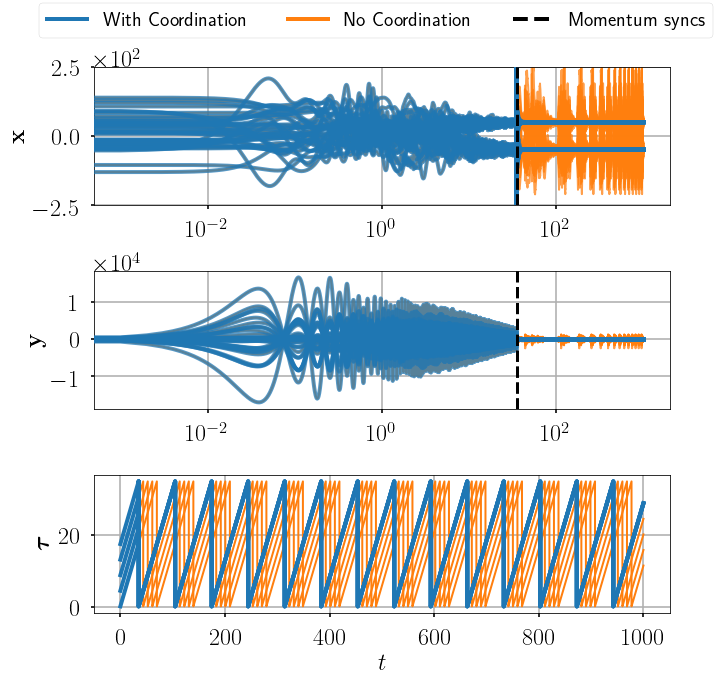

In [5]:
paths = [x1tox2,never_sync_path]# never_resets, ]#, x2tox1, cortes, never_sync_path]
labels = [r'$HARDD$', r'$HARDD (Non-cooperative)$']#, r'$ADD$']#, 'x2 to x1', 'cortes', 'never sync']
dataDualList = [np.load(file + power2 +'dual_vars.npz') for file in paths]
dataPrimalList = [np.load(file + power2 +'primal_vars.npz') for file in paths]
fig, axs = plt.subplots(3, 1, figsize = (9.5, 9))
colors = ['#1f77b4', '#ff7f0e']
zorders = [4, 2]
lws = [4, 2]

for i, (dual, primal, color, zorder, lw) in enumerate(zip(dataDualList, dataPrimalList, colors, zorders, lws)):
    print(color, zorder, lw)
    n, l, p = dual['n'], dual['l'], dual['p']
    state = dual['y']
    x = state[:, :n*p, :].squeeze(axis = 2)
    y = state[:, n*p: 2*n*p, :].squeeze(axis = 2)
    tau = state[:, 2*n*p:, :].squeeze(axis = 2)

    t = dual['t']
    t = t[:, 0] if len(t.shape) == 2 else t

    ax = axs[0]
    ax.semilogx(t, x, alpha = 0.75, c = color, zorder = zorder, lw = lw)
    l1 = ax.axvline(35, ls = '--',  c = 'k', lw = 3, zorder = 5)
    ax.set_ylabel(r'$\mathbf{x}$')
    ax.set_ylim(-250, 250)
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

    ax = axs[1]
    ax.semilogx(t, y, alpha = 0.75, c = color, lw = lw, zorder = zorder)#label = label)

    l2 = ax.axvline(35, ls = '--', c = 'k', lw = 3, zorder = 5)
    ax.set_ylabel(r'$\mathbf{y}$')
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))



    ax = axs[2]
    ax.plot(t, tau, c = color, lw = lw, zorder = zorder)#, label = label)
    ax.set_ylabel(r'$\bm{\tau}$')
    ax.set_xlabel(r'$t$')
    
custom_lines = [Line2D([0], [0], color=colors[0], lw=4),
                Line2D([0], [0], color=colors[1], lw=4),
                Line2D([0], [0], color='k', lw=4, linestyle = '--')]

fig.legend(custom_lines, 
           ['With Coordination', 'No Coordination', 'Momentum syncs'],
          loc='upper center',
          ncol = 3,
          bbox_to_anchor=(0.55, 1.062),
          fontsize = 20)
plt.tight_layout()   

for ax in axs:
    ax.grid()
plt.savefig(results_path + '/dual_vars_both.png', bbox_inches ='tight', dpi = 600)

## Disturbances

In [ ]:
dataDualnoReset = np.load(disturbances_path +'dual_vars_no_reset.npz')
dataPrimalnoReset = np.load(disturbances_path + 'primal_vars_no_reset.npz')

In [ ]:
fig = plt.figure(figsize = (9, 5))
ax = plt.gca()
primal = dataPrimalnoReset
dual = dataDualnoReset

t = primal['t']
t = t[:, 0] if len(t.shape) == 2 else t
cost = primal['cost'].squeeze(axis = 2)

ax = plt.gca()
ax.semilogx(t, cost)
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$\left|F(z) - F^*\right|$', fontsize = 25)

In [ ]:
dual = dataDualnoReset
n, l, p = dual['n'], dual['l'], dual['p']
state = dual['y']
x = state[:, :n*p, :].squeeze(axis = 2)
y = state[:, n*p: 2*n*p, :].squeeze(axis = 2)
tau = state[:, 2*n*p:, :].squeeze(axis = 2)

t = dual['t']
t = t[:, 0] if len(t.shape) == 2 else t

fig = plt.figure(figsize = (9, 5))
ax = plt.gca()
ax.semilogx(t, x)
l1 = ax.axvline(35, ls = '--',  c = 'k', lw = 3, zorder = 5)
ax.set_ylabel(r'$\mathbf{x}$')
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

In [ ]:
dual = dataDualList[-1]
n, l, p = dual['n'], dual['l'], dual['p']
state = dual['y']
tau = state[:, 2*n*p:, :].squeeze(axis = 2)

In [ ]:
tau[0,:]

In [ ]:
dataNever.shape

In [ ]:
4.45-0.1

In [ ]:
4.35*4